In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pygeohash
!pip install geopandas
!pip install polygeohasher
!pip install contextily
!pip install matplotlib
!pip install shapely
!pip install seaborn
!pip install h3
!pip install geojson
!pip install gmaps
!pip install ipywidgets
!pip install widgetsnbextension
!pip install pysal

In [4]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from shapely import wkt
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Graficos Mayo 2022

In [5]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin

area = gpd.read_file('/content/drive/MyDrive/METRO/colab/Data/Otros SHP/isocrona_MAX.shp')
area_l2 = gpd.read_file('/content/drive/MyDrive/METRO/colab/Data/Otros SHP/L2/L2_20MIN.shp')
l = pd.read_csv('/content/drive/MyDrive/METRO/colab/Data/DATA HOMOGENEA - PASO LIMPIEZA/BTA_INMO_IQR_JUNIO.csv', encoding='utf-8')
l = l.drop(columns=['geometry'])
inmueblesBta = gpd.GeoDataFrame(l, geometry=gpd.points_from_xy(l.Longitud, l.Latitud))
inmueblesBta_L1 = sjoin(inmueblesBta, area, how='inner')
inmueblesBta_L2 = sjoin(inmueblesBta, area_l2, how='inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7,10,11,16,18,19,21,23,33,35,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#inmueblesBta.to_file("/content/drive/MyDrive/METRO/colab/Data/DATA HOMOGENEA - PASO LIMPIEZA/MAYO22 - GEO/OfertasTotales.shp")
#inmueblesBta_L1["tipo_inmueble"].replace({"Edificio":"edificio"}, inplace=True)
#inmueblesBta_L2["tipo_inmueble"].replace({"Edificio":"edificio"}, inplace=True)

In [ ]:
#inmueblesBta_L1[(inmueblesBta_L1.tipo_transaccion=='Arriendo')&(inmueblesBta_L1.Valor_M2 <= 3000)].head(3).T

In [ ]:
#CC_raw.head(3).T

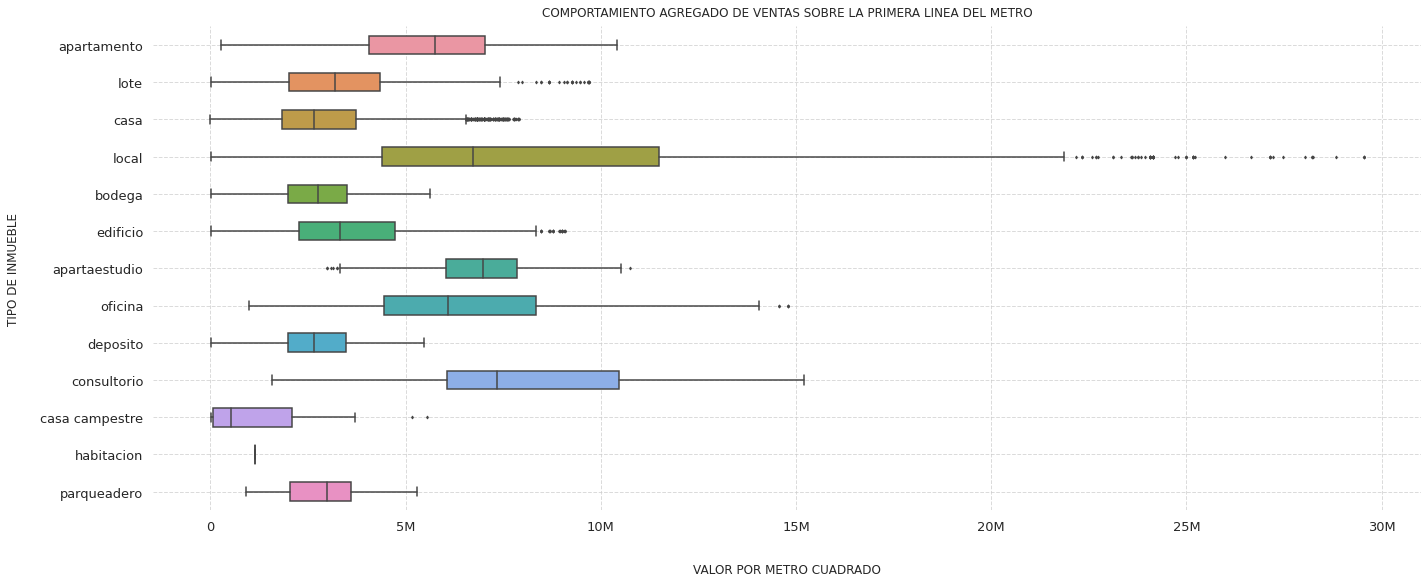

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 8.27))
sns.boxplot(x="Valor_M2", y="tipo_inmueble", orient="h", width=0.5, fliersize=2, data=inmueblesBta_L1[(inmueblesBta_L1.tipo_transaccion=='Venta')])
ax.set_title('Comportamiento Agregado de Ventas Sobre La Primera Linea del Metro'.upper(),pad=10)
ax.set_xlabel('Valor Por Metro Cuadrado'.upper())
ax.set_ylabel('Tipo De Inmueble'.upper())

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 30

ax.tick_params(labelsize=13)
ax.set_xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000])
ax.set_xticklabels([r'0',r'5M', r'10M', r'15M', r'20M', r'25M', r'30M'])

ax.grid(alpha=0.7, linestyle='dashed', linewidth=1)


ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color("none")
fig.tight_layout()

#ax.set_axis_labels("tipo de inmueble", "Valor Metro Cuadrado")

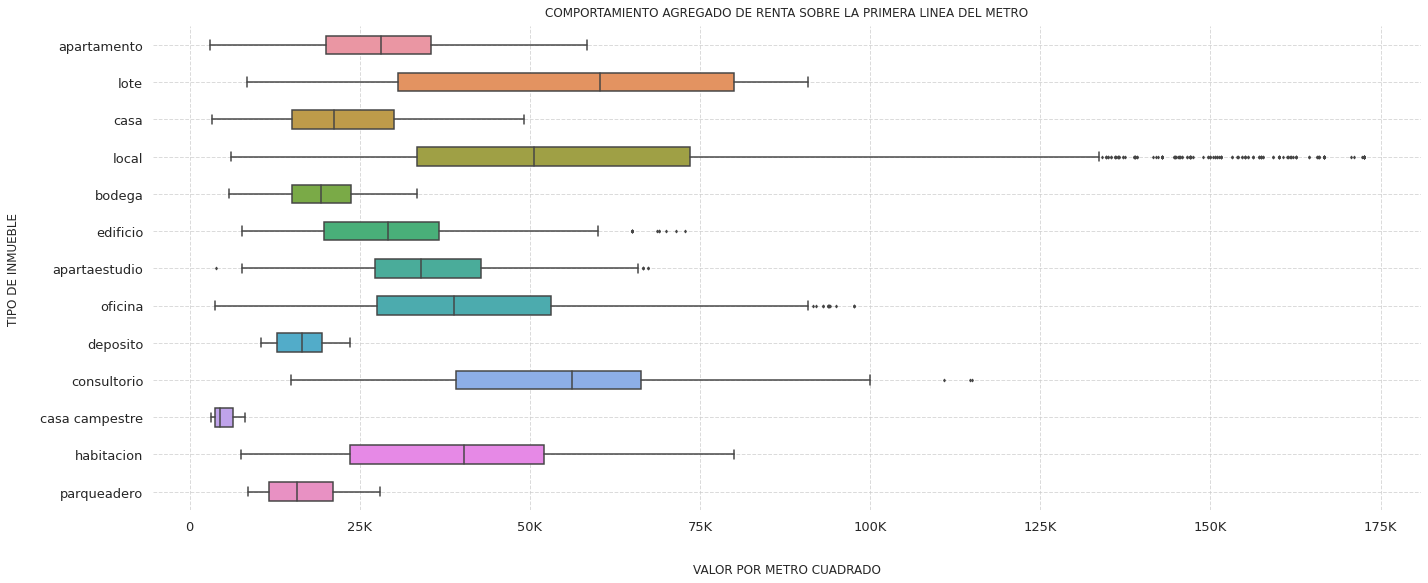

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 8.27))
sns.boxplot(x="Valor_M2", y="tipo_inmueble", orient="h", width=0.5, fliersize=2, data=inmueblesBta_L1[(inmueblesBta_L1.tipo_transaccion=='Arriendo')])
ax.set_title('Comportamiento Agregado de Renta Sobre La Primera Linea del Metro'.upper(),pad=10)
ax.set_xlabel('Valor Por Metro Cuadrado'.upper())
ax.set_ylabel('Tipo De Inmueble'.upper())

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 30

ax.tick_params(labelsize=13)
#ax.set_xticks()
ax.set_xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000])
ax.set_xticklabels([r'0',r'25K', r'50K', r'75K', r'100K', r'125K', r'150K',r'175K'])

ax.grid(alpha=0.7, linestyle='dashed', linewidth=1)


ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color("none")
fig.tight_layout()

In [ ]:
import numpy as np
inmueblesBta_L1["Valor_M2"]=inmueblesBta_L1["Valor_M2"].astype(np.float64)
inmueblesBta_L2["Valor_M2"]=inmueblesBta_L2["Valor_M2"].astype(np.float64)

In [ ]:
inmueblesBta_L2.columns

Index(['Unnamed: 0', 'level_0', 'index', 'area', 'tipo_transaccion',
       'tipo_inmueble', 'id', 'nombre_usuario', 'codigo', 'precio',
       'num_banos', 'edad', 'fecha_modificacion', 'fecha_creacion',
       'num_habitaciones', 'num_parqueaderos', 'canon_arrendamiento',
       'localidad', 'estrato', 'url_inmueble', 'barrio',
       'valor_administracion', 'contacto_llamada', 'id_usuario', 'url_encode',
       'Latitud', 'Longitud', 'Valor_M2', 'codigo manzana', 'estratoCarto',
       'dist', 'estratoAjustado', 'uso', 'direccion', 'descripcion',
       'nombre_usuario ', 'fecha_expiracion', 'fecha_publicado', 'piso',
       'periodo', 'titulo', 'geometry', 'index_right', 'group_inde', 'value',
       'center', 'total_pop', 'layer', 'path'],
      dtype='object')

#Conteos H3 ofertas Linea 2

In [ ]:
from IPython.utils.text import columnize
import h3

# index each data point into the spatial index of the specified resolution
data_L2 = inmueblesBta_L2.copy()


for res in range(7, 11):
    col_hex_id = "hex_id_{}".format(res)
    col_geom = "geometry_{}".format(res)
    msg_ = "At resolution {} -->  H3 cell id : {} and its geometry: {} "
    print(msg_.format(res, col_hex_id, col_geom))

    data_L2[col_hex_id] = data_L2.apply(
                                        lambda row: h3.geo_to_h3(
                                                    lat = row["Latitud"],
                                                    lng = row["Longitud"],
                                                    resolution = res),
                                        axis = 1)

    # use h3.h3_to_geo_boundary to obtain the geometries of these hexagons
    data_L2[col_geom] = data_L2[col_hex_id].apply(
                                        lambda x: {"type": "Polygon",
                                                   "coordinates":
                                                   [h3.h3_to_geo_boundary(
                                                       h=x, geo_json=True)]
                                                   }
                                         )


At resolution 7 -->  H3 cell id : hex_id_7 and its geometry: geometry_7 
At resolution 8 -->  H3 cell id : hex_id_8 and its geometry: geometry_8 
At resolution 9 -->  H3 cell id : hex_id_9 and its geometry: geometry_9 
At resolution 10 -->  H3 cell id : hex_id_10 and its geometry: geometry_10 


In [ ]:
def counts_by_hexagon(df, res):
    """Aggregates the number of busstops at hexagon level"""

    col_hex_id = "hex_id_{}".format(res)
    col_geometry = "geometry_{}".format(res)

    # within each group preserve the first geometry and count the ids
    df_aggreg = df.groupby(by = col_hex_id).agg({col_geometry: "first",
                                                "Latitud": "count"})
    #pilas con predio_fin

    df_aggreg.reset_index(inplace = True)
    df_aggreg.rename(columns={"Latitud": "value"}, inplace = True)

    df_aggreg.sort_values(by = "value", ascending = False, inplace = True)
    return df_aggreg

In [ ]:
df_aggreg_8 = counts_by_hexagon(df = data_L2, res = 9)
print(df_aggreg_8.shape)
df_aggreg_8.head(5)

(374, 3)


,hex_id_9,geometry_9,value
73,8966e0925dbffff,"{'type': 'Polygon', 'coordinates': [((-74.0874...",1367
345,8966e42d603ffff,"{'type': 'Polygon', 'coordinates': [((-74.0590...",787
328,8966e42d287ffff,"{'type': 'Polygon', 'coordinates': [((-74.0548...",585
369,8966e42d677ffff,"{'type': 'Polygon', 'coordinates': [((-74.0596...",581
365,8966e42d667ffff,"{'type': 'Polygon', 'coordinates': [((-74.0599...",536


In [ ]:
import branca.colormap as cm
import json
from geojson.feature import *

from folium import Map, Marker, GeoJson
def base_empty_map():
    """Prepares a folium map centered in a central GPS point of Bogota"""
    m = Map(location = [4.653954, -74.103230],
            zoom_start = 9.5,
            tiles = "cartodbpositron",
            attr = '''© <a href="http://www.openstreetmap.org/copyright">
                      OpenStreetMap</a>contributors ©
                      <a href="http://cartodb.com/attributions#basemaps">
                      CartoDB</a>''',
            height=500
            )
    return m
    
def hexagons_dataframe_to_geojson(df_hex, hex_id_field,
                                  geometry_field, value_field,
                                  file_output = None):

    """Produce the GeoJSON representation containing all geometries in a dataframe
     based on a column in geojson format (geometry_field)"""

    list_features = []

    for i, row in df_hex.iterrows():
        feature = Feature(geometry = row[geometry_field],
                          id = row[hex_id_field],
                          properties = {"value": row[value_field],
                                        "label": '${:,.2f}'.format(row[value_field]),
                                        "id": row[hex_id_field],
                                        })
        list_features.append(feature)

    feat_collection = FeatureCollection(list_features)

    geojson_result = json.dumps(feat_collection)

    # optionally write to file
    if file_output is not None:
        with open(file_output, "w") as f:
            json.dump(feat_collection, f)

    return geojson_result


# --------------------------------------------------------------------


def choropleth_map(df_aggreg, hex_id_field, geometry_field, value_field,
                   layer_name, initial_map = None, kind = "linear",
                   border_color = 'black',line_opacity=0.2, fill_opacity = 0.5,
                   with_legend = False):

    """Plots a choropleth map with folium"""

    if initial_map is None:
        initial_map = base_empty_map()

    # the custom colormap depends on the map kind
    if kind == "linear":
        min_value = df_aggreg[value_field].min()
        max_value = df_aggreg[value_field].max()
        m = round((min_value + max_value) / 2, 0)
        custom_cm = cm.LinearColormap(['green', 'yellow', 'red'],
                                      vmin = min_value,
                                      vmax = max_value)
    elif kind == "outlier":
        # for outliers, values would be -1,0,1
        custom_cm = cm.LinearColormap(['blue', 'white', 'red'],
                                      vmin=-1, vmax=1)
    elif kind == "filled_nulls":
        min_value = df_aggreg[df_aggreg[value_field] > 0][value_field].min()
        max_value = df_aggreg[df_aggreg[value_field] > 0][value_field].max()
        m = round((min_value + max_value) / 2, 0)
        custom_cm = cm.LinearColormap(['silver', 'green', 'yellow', 'red'],
                                      index = [0, min_value, m, max_value],
                                      vmin = min_value,
                                      vmax = max_value)

    # create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_aggreg, hex_id_field,
                                                 geometry_field, value_field)

    # plot on map
    GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': custom_cm(feature['properties']['value']),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity,
        },
        name = layer_name,
    ).add_to(initial_map)
    
    # add legend (not recommended if multiple layers)
    if with_legend is True:
        custom_cm.add_to(initial_map)

    return geojson_data, initial_map
    #return geojson_data

In [ ]:
Gjson, m_hex = choropleth_map(df_aggreg = df_aggreg_8,
                       hex_id_field = "hex_id_9",
                       geometry_field = "geometry_9",
                       value_field = "value",
                       layer_name = "Choropleth 9",
                       with_legend = True)
m_hex

In [ ]:
df = gpd.read_file(Gjson)
df.to_file('/content/drive/MyDrive/METRO/colab/Data/Otros SHP/L2/conteo_mayo.shp')

# Conteos H3 ofertas Linea 1

In [ ]:
data_L1 = inmueblesBta_L1.copy()


for res in range(7, 11):
    col_hex_id = "hex_id_{}".format(res)
    col_geom = "geometry_{}".format(res)
    msg_ = "At resolution {} -->  H3 cell id : {} and its geometry: {} "
    print(msg_.format(res, col_hex_id, col_geom))

    data_L1[col_hex_id] = data_L1.apply(
                                        lambda row: h3.geo_to_h3(
                                                    lat = row["Latitud"],
                                                    lng = row["Longitud"],
                                                    resolution = res),
                                        axis = 1)

    # use h3.h3_to_geo_boundary to obtain the geometries of these hexagons
    data_L1[col_geom] = data_L1[col_hex_id].apply(
                                        lambda x: {"type": "Polygon",
                                                   "coordinates":
                                                   [h3.h3_to_geo_boundary(
                                                       h=x, geo_json=True)]
                                                   }
                                         )

At resolution 7 -->  H3 cell id : hex_id_7 and its geometry: geometry_7 
At resolution 8 -->  H3 cell id : hex_id_8 and its geometry: geometry_8 
At resolution 9 -->  H3 cell id : hex_id_9 and its geometry: geometry_9 
At resolution 10 -->  H3 cell id : hex_id_10 and its geometry: geometry_10 


In [ ]:
df_aggreg_8 = counts_by_hexagon(df = data_L1, res = 9)
print(df_aggreg_8.shape)
df_aggreg_8.head(5)

(595, 3)


,hex_id_9,geometry_9,value
564,8966e42d603ffff,"{'type': 'Polygon', 'coordinates': [((-74.0590...",787
542,8966e42d273ffff,"{'type': 'Polygon', 'coordinates': [((-74.0642...",775
289,8966e092847ffff,"{'type': 'Polygon', 'coordinates': [((-74.0708...",598
546,8966e42d287ffff,"{'type': 'Polygon', 'coordinates': [((-74.0548...",585
589,8966e42d677ffff,"{'type': 'Polygon', 'coordinates': [((-74.0596...",581


In [ ]:
Gjson, m_hex = choropleth_map(df_aggreg = df_aggreg_8,
                       hex_id_field = "hex_id_9",
                       geometry_field = "geometry_9",
                       value_field = "value",
                       layer_name = "Choropleth 9",
                       with_legend = True)
m_hex

In [ ]:
df1 = gpd.read_file(Gjson)
df1.to_file('/content/drive/MyDrive/METRO/colab/Data/Otros SHP/L1/conteo_L1_mayo.shp')

#Histogramas

In [ ]:
inmueblesBta_L1.head(3).T

##Linea 1

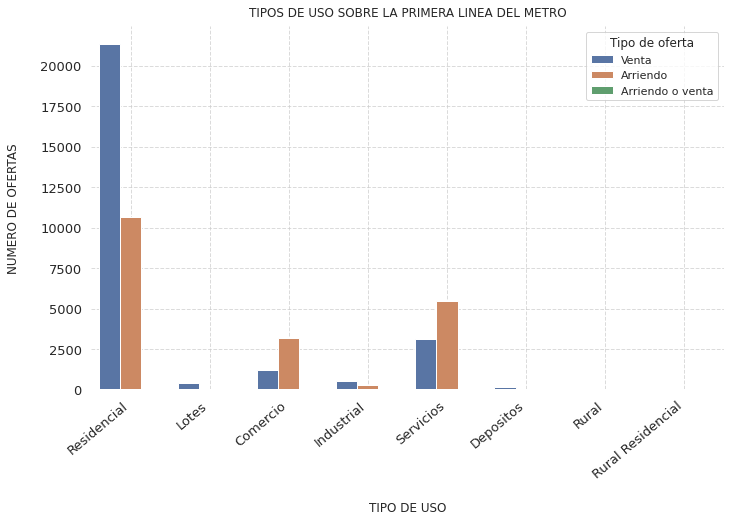

In [ ]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
ax = sns.countplot(x="uso", hue="tipo_transaccion", data=inmueblesBta_L1[inmueblesBta_L1['uso']!='0'], palette = "deep")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")




ax.set_title('tipos de uso sobre La Primera Linea del Metro'.upper(),pad=10)
ax.set_xlabel('Tipo de uso'.upper())
ax.set_ylabel('Numero de ofertas'.upper())

plt.legend(title='Tipo de oferta', loc='upper right')
plt.tight_layout()
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20
ax.tick_params(labelsize=13)
ax.grid(alpha=0.7, linestyle='dashed', linewidth=1)
ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color("none")
plt.show()

# #ax.set_xticks()
# ax.set_xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000])
# ax.set_xticklabels([r'0',r'25K', r'50K', r'75K', r'100K', r'125K', r'150K',r'175K'])



# fig.tight_layout()

In [ ]:

xestacion = gpd.read_file('/content/drive/MyDrive/METRO/colab/Data/DATA HOMOGENEA - PASO LIMPIEZA/MAYO22 - GEO/Ofertas_estacion.shp')


In [ ]:
xestacion["Valor_M2"]=xestacion["Valor_M2"].astype(np.float64)


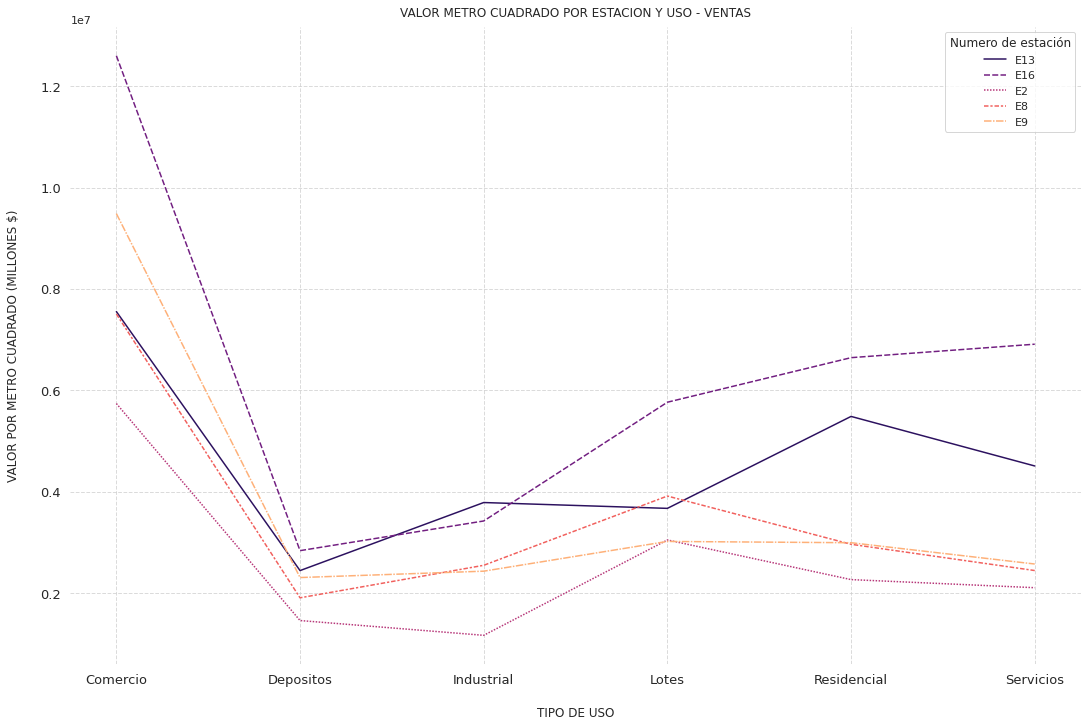

In [ ]:
plt.figure(figsize=(15,10))
table = pd.pivot_table(xestacion[(xestacion.layer.isin(['E2','E8','E9','E13','E16']))&(xestacion.uso != '0')&(xestacion.uso != 'Rural Residencial')&(xestacion.uso != 'Rural')&(xestacion.tipo_trans=='Venta')], values=['Valor_M2'], index=['layer','uso'],aggfunc={'Valor_M2': np.mean})
ax = sns.lineplot(data=table, x="uso", y="Valor_M2", hue="layer", style="layer",palette="magma")

ax.set_title('Valor metro cuadrado por estacion y uso - Ventas'.upper(),pad=10)
ax.set_xlabel('Tipo de uso'.upper())
ax.set_ylabel('Valor por metro cuadrado (Millones $)'.upper())

plt.legend(title='Numero de estación', loc='upper right')
plt.tight_layout()
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20
ax.tick_params(labelsize=13)
ax.grid(alpha=0.7, linestyle='dashed', linewidth=1)
ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color("none")

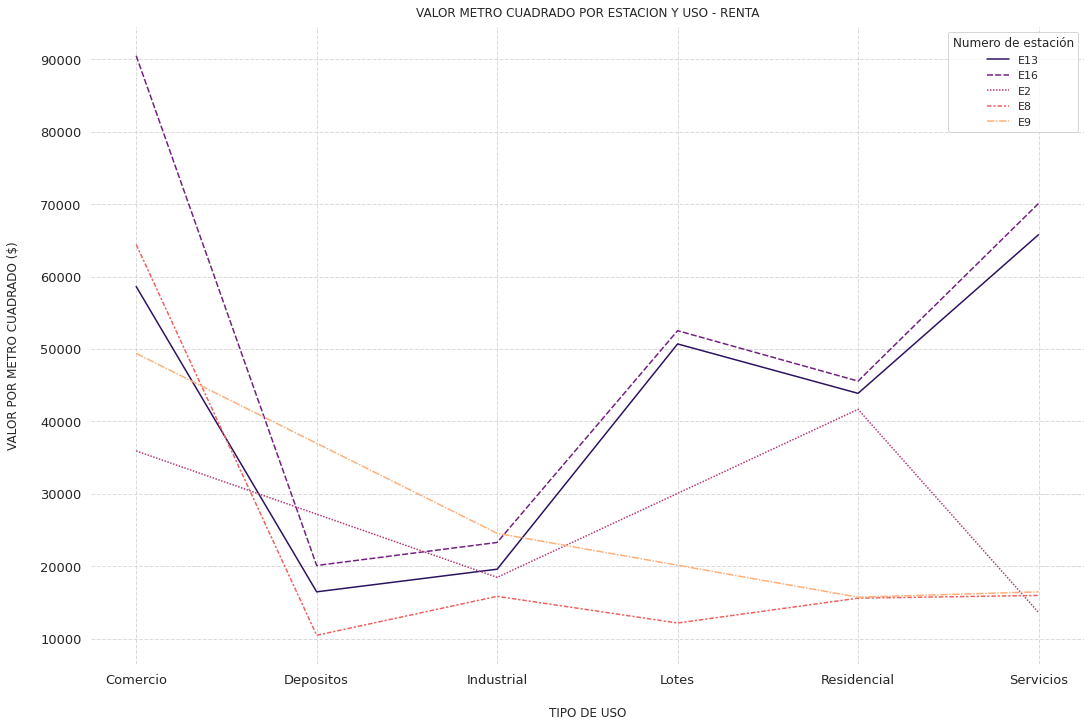

In [ ]:
plt.figure(figsize=(15,10))
table = pd.pivot_table(xestacion[(xestacion.layer.isin(['E2','E8','E9','E13','E16']))&(xestacion.uso != '0')&(xestacion.uso != 'Rural Residencial')&(xestacion.uso != 'Rural')&(xestacion.tipo_trans=='Arriendo')], values=['Valor_M2'], index=['layer','uso'],aggfunc={'Valor_M2': np.mean})
ax = sns.lineplot(data=table, x="uso", y="Valor_M2", hue="layer", style="layer",palette="magma")

ax.set_title('Valor metro cuadrado por estacion y uso - renta'.upper(),pad=10)
ax.set_xlabel('Tipo de uso'.upper())
ax.set_ylabel('Valor por metro cuadrado ($)'.upper())

plt.legend(title='Numero de estación', loc='upper right')
plt.tight_layout()
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20
ax.tick_params(labelsize=13)
ax.grid(alpha=0.7, linestyle='dashed', linewidth=1)
ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color("none")

In [ ]:
xestacion.columns

Index(['field_1', 'index', 'area', 'tipo_trans', 'tipo_inmue', 'id',
       'nombre_usu', 'codigo', 'precio', 'num_banos', 'edad', 'fecha_modi',
       'fecha_crea', 'num_habita', 'num_parque', 'canon_arre', 'localidad',
       'estrato', 'url_inmueb', 'barrio', 'valor_admi', 'contacto_l',
       'id_usuario', 'url_encode', 'Latitud', 'Longitud', 'Valor_M2',
       'codigo man', 'estratoCar', 'dist', 'estratoAju', 'uso', 'direccion',
       'descripcio', 'nombre_u_1', 'fecha_expi', 'fecha_publ', 'piso',
       'periodo', 'titulo', 'index_righ', 'group_inde', 'value', 'total_pop',
       'group_in_1', 'value_2', 'total_pop_', 'Tiempo', 'center', 'layer',
       'path', 'geometry'],
      dtype='object')

##Linea 2

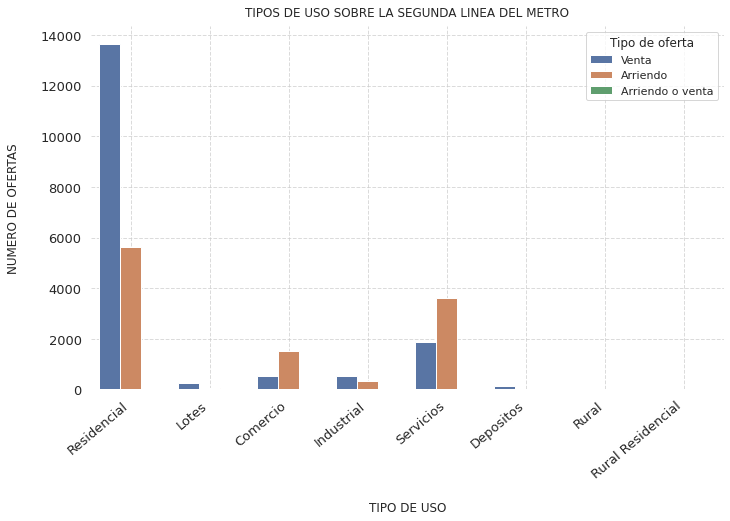

In [ ]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
ax = sns.countplot(x="uso", hue="tipo_transaccion", data=inmueblesBta_L2[inmueblesBta_L2['uso']!='0'], palette = "deep")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")




ax.set_title('tipos de uso sobre La Segunda Linea del Metro'.upper(),pad=10)
ax.set_xlabel('Tipo de uso'.upper())
ax.set_ylabel('Numero de ofertas'.upper())

plt.legend(title='Tipo de oferta', loc='upper right')
plt.tight_layout()
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20
ax.tick_params(labelsize=13)
ax.grid(alpha=0.7, linestyle='dashed', linewidth=1)
ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color("none")
plt.show()


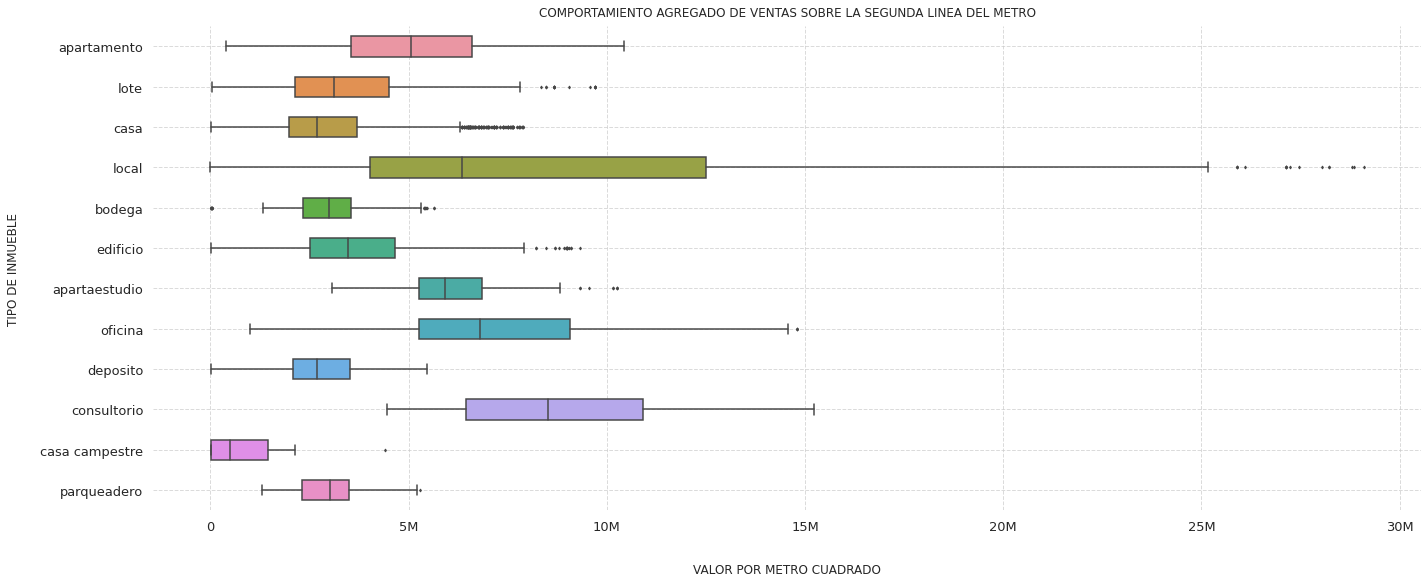

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 8.27))
sns.boxplot(x="Valor_M2", y="tipo_inmueble", orient="h", width=0.5, fliersize=2, data=inmueblesBta_L2[(inmueblesBta_L2.tipo_transaccion=='Venta')])
ax.set_title('Comportamiento Agregado de Ventas Sobre La Segunda Linea del Metro'.upper(),pad=10)
ax.set_xlabel('Valor Por Metro Cuadrado'.upper())
ax.set_ylabel('Tipo De Inmueble'.upper())

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 30

ax.tick_params(labelsize=13)
ax.set_xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000])
ax.set_xticklabels([r'0',r'5M', r'10M', r'15M', r'20M', r'25M', r'30M'])

ax.grid(alpha=0.7, linestyle='dashed', linewidth=1)


ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color("none")
fig.tight_layout()

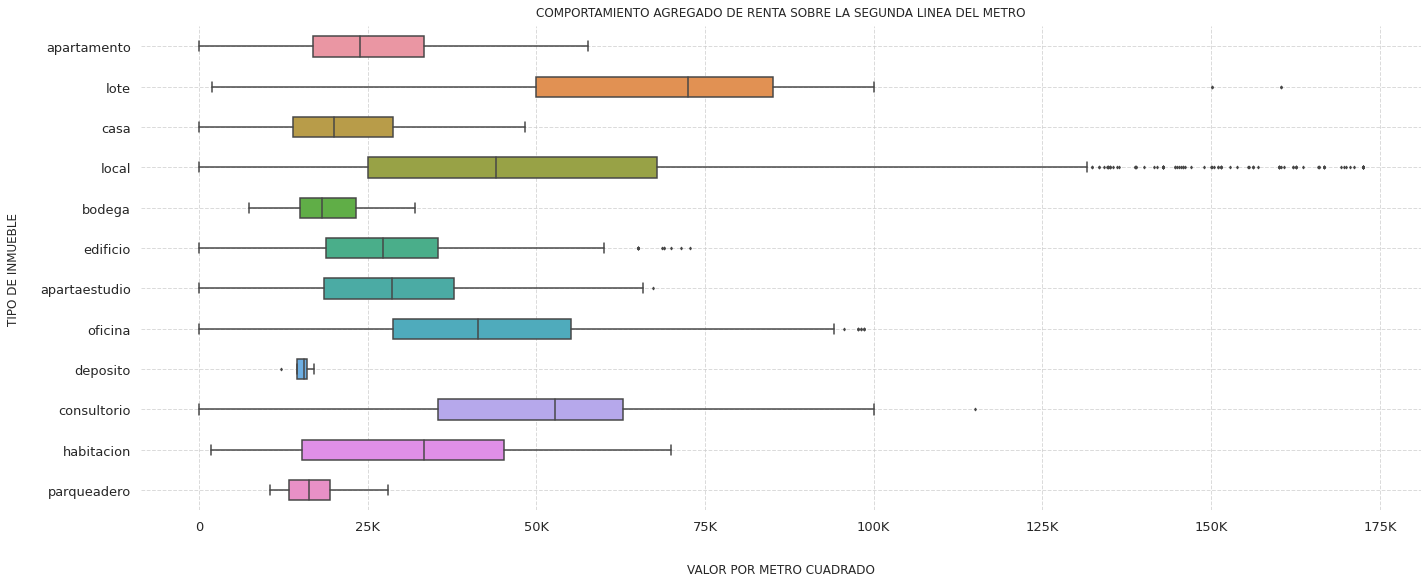

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 8.27))
sns.boxplot(x="Valor_M2", y="tipo_inmueble", orient="h", width=0.5, fliersize=2, data=inmueblesBta_L2[(inmueblesBta_L2.tipo_transaccion=='Arriendo')])
ax.set_title('Comportamiento Agregado de Renta Sobre La Segunda Linea del Metro'.upper(),pad=10)
ax.set_xlabel('Valor Por Metro Cuadrado'.upper())
ax.set_ylabel('Tipo De Inmueble'.upper())

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 30

ax.tick_params(labelsize=13)
#ax.set_xticks()
ax.set_xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000])
ax.set_xticklabels([r'0',r'25K', r'50K', r'75K', r'100K', r'125K', r'150K',r'175K'])

ax.grid(alpha=0.7, linestyle='dashed', linewidth=1)


ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color("none")
fig.tight_layout()